<a href="https://colab.research.google.com/github/tiwarishivam-pixel/EDUNET_Project/blob/main/%F0%9F%8C%AA%EF%B8%8F_Predicting_Regional_ClimateRiskLevels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RANDOM FOREST

---

### 📋 The problem it solves:

You want to predict something — e.g., `vulnerability_level` — based on many features like temperature, GDP, etc.

One way is to build a **Decision Tree**:

* A tree asks questions like:

  > “Is GDP < 3000?” → Yes → go left; No → go right
  > Then at the end of the tree it predicts 0, 1, or 2.

But a single tree can **overfit** — it can memorize the training data instead of learning general patterns.

---

### 🌳 So what is Random Forest?

Instead of just **one tree**, Random Forest builds a **forest of many trees (e.g., 100)**.

#### How?

✅ Step 1 — Build lots of trees:

* Each tree is trained on a **random sample of the data**
  (e.g., Tree 1 sees rows 1, 3, 5, 7; Tree 2 sees 2, 4, 6, 8 — chosen randomly).
* At each decision point (split) in the tree, it only looks at a **random subset of the features**.

So each tree is slightly different.

---

✅ Step 2 — Make predictions:

* You now have many trees, and each tree votes:

  ```
  Tree 1 → predicts 0
  Tree 2 → predicts 1
  Tree 3 → predicts 0
  Tree 4 → predicts 2
  Tree 5 → predicts 0
  ```
* The **majority vote wins.**
  Here, since most trees said `0`, the final prediction is `0`.

---

### 🔷 Why does this help?

Because each tree sees the data slightly differently, some may make mistakes but others don’t — and the group (the forest) makes a better decision than just one tree.

It’s just like asking 100 people their opinion and taking the majority — more reliable than asking only one person!

---

### 🖼️ Visual idea:

```
Data → [Tree 1] → 0
     → [Tree 2] → 1
     → [Tree 3] → 0
     → [Tree 4] → 2
     → [Tree 5] → 0
                .
                .
                .
Final prediction = Majority vote = 0
```

---

### 🔷 Summary Table:

| Step  | What happens                                       |
| ----- | -------------------------------------------------- |
| 🌱 1  | Take random samples of data (with replacement)     |
| 🌲 2  | Grow many decision trees (each slightly different) |
| 🗳️ 3 | Each tree votes                                    |
| 🥇 4  | Final prediction = most common vote                |

---

### 🚀 Why is it good?

✅ Handles messy data
✅ Reduces overfitting
✅ Works well even if some features are noisy
✅ Can tell you which features are most important

---

If you want, I can also:
🌟 Show you a very simple **diagram** of a random forest
🌟 Or run a **tiny example step-by-step on real numbers**
🌟 Or build & test one on your dataset and show predictions

## Load the data

### Subtask:
Load the dataset from "/content/climate_vulnerability_dataset_with_dummy.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset into a pandas DataFrame and display the first few rows.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/climate_vulnerability_dataset_with_dummy.csv')
display(df.head())

,environmental_quality_index,social_vulnerability_score,population_affected_by_hazards,avg_temp_celsius,precipitation_mm,vegetation_index,num_extreme_weather_events,sea_level_rise_mm,avg_humidity_percent,access_to_clean_water_percent,...,population_density,gdp_per_capita,poverty_rate,urban_population_percent,env_soc_interaction,pop_density_deviation_from_mean,geographic_zone_Coastal,geographic_zone_Inland,geographic_zone_Mountain,vulnerability_level
0,-9999.000000,96.291176,4208.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31.704903,0.0,True,False,False,0
1,0.715295,60.570589,7479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,43.325826,0.0,True,False,False,2
2,0.685901,1.408078,-9999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.965802,0.0,True,False,False,1
3,0.862162,43.696100,5289.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,37.673131,0.0,False,True,False,1
4,0.473293,-9999.000000,1928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31.704903,0.0,True,False,False,0


## Explore the data

### Subtask:
Perform exploratory data analysis (EDA) to understand the data distribution, identify potential issues, and gain insights into the features and target variable. This will include visualizing the data.


**Reasoning**:
Display the shape and data types of the DataFrame to get an initial understanding of its structure and contents.



In [ ]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:")
print(df.shape)

# Display the data types of each column
print("\nData types of each column:")
df.info()

Shape of the DataFrame:
(1010, 22)

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   environmental_quality_index      1010 non-null   float64
 1   social_vulnerability_score       1010 non-null   float64
 2   population_affected_by_hazards   1010 non-null   float64
 3   avg_temp_celsius                 1010 non-null   float64
 4   precipitation_mm                 1010 non-null   float64
 5   vegetation_index                 1010 non-null   float64
 6   num_extreme_weather_events       1010 non-null   float64
 7   sea_level_rise_mm                1010 non-null   float64
 8   avg_humidity_percent             1010 non-null   float64
 9   access_to_clean_water_percent    1010 non-null   float64
 10  literacy_rate                    10 non-null     float64
 11  gender_equality_ind

**Reasoning**:
Generate descriptive statistics for numerical columns and check for missing values to understand the data distribution and identify potential issues.



In [ ]:
# Generate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
display(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Descriptive statistics for numerical columns:


,environmental_quality_index,social_vulnerability_score,population_affected_by_hazards,avg_temp_celsius,precipitation_mm,vegetation_index,num_extreme_weather_events,sea_level_rise_mm,avg_humidity_percent,access_to_clean_water_percent,literacy_rate,gender_equality_index,population_density,gdp_per_capita,poverty_rate,urban_population_percent,env_soc_interaction,pop_density_deviation_from_mean,vulnerability_level
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,10.0,10.0,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,-19.302031,40.490014,4840.689109,14.946539,253.259579,0.501933,9.459406,50.283539,49.755634,49.100997,0.0,0.0,4955.524260,25009.173416,49.015055,50.706815,48.646791,-102.777870,1.060396
std,444.751405,317.553005,2937.131774,14.331986,147.640250,0.288367,5.823369,29.470454,29.264700,28.371986,0.0,0.0,2890.201675,14170.619642,29.111712,28.903286,29.327411,2843.590083,0.814460
min,-9999.000000,-9999.000000,-9999.000000,-9.923760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.073924,-4991.750828,0.000000
25%,0.237011,25.516057,2336.500000,2.684412,126.100950,0.253362,5.000000,23.755984,24.547341,24.960196,0.0,0.0,2540.440732,13172.595936,24.600519,26.764611,20.842219,-2473.477602,0.000000
50%,0.498575,51.058175,4814.000000,14.790685,254.866603,0.505865,9.000000,50.375117,48.911755,49.171694,0.0,0.0,4945.368956,24745.753368,48.086629,50.123206,48.333547,-239.231860,1.000000
75%,0.749521,76.181034,7304.750000,27.367532,383.228275,0.752190,15.000000,76.226335,76.028689,73.051094,0.0,0.0,7361.775489,37070.979409,73.423279,75.824791,73.930897,2240.644190,2.000000
max,0.998450,99.965185,9998.000000,39.973021,499.887452,0.998935,19.000000,99.919004,99.761443,99.977030,0.0,0.0,9987.467944,49977.277216,99.855158,99.981666,99.957691,4970.055401,2.000000



Missing values per column:
environmental_quality_index           0
social_vulnerability_score            0
population_affected_by_hazards        0
avg_temp_celsius                      0
precipitation_mm                      0
vegetation_index                      0
num_extreme_weather_events            0
sea_level_rise_mm                     0
avg_humidity_percent                  0
access_to_clean_water_percent         0
literacy_rate                      1000
gender_equality_index              1000
population_density                    0
gdp_per_capita                        0
poverty_rate                          0
urban_population_percent              0
env_soc_interaction                   0
pop_density_deviation_from_mean       0
geographic_zone_Coastal               0
geographic_zone_Inland                0
geographic_zone_Mountain              0
vulnerability_level                   0
dtype: int64


**Reasoning**:
Visualize the distribution of the target variable and key numerical features to understand their patterns and identify potential outliers or imbalances.



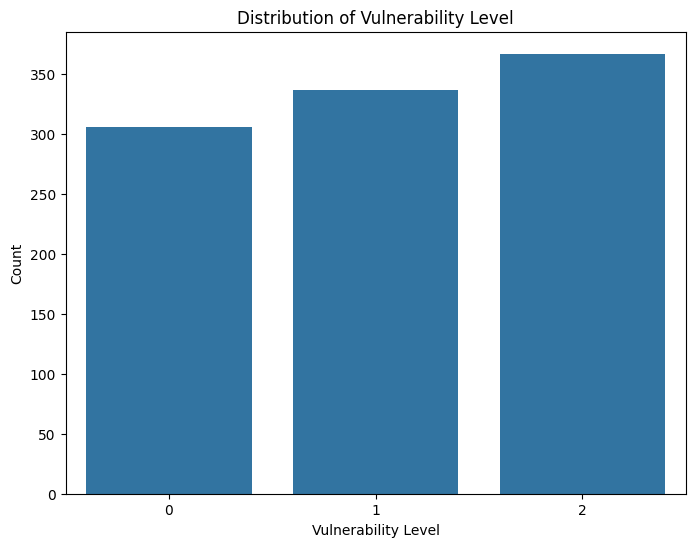

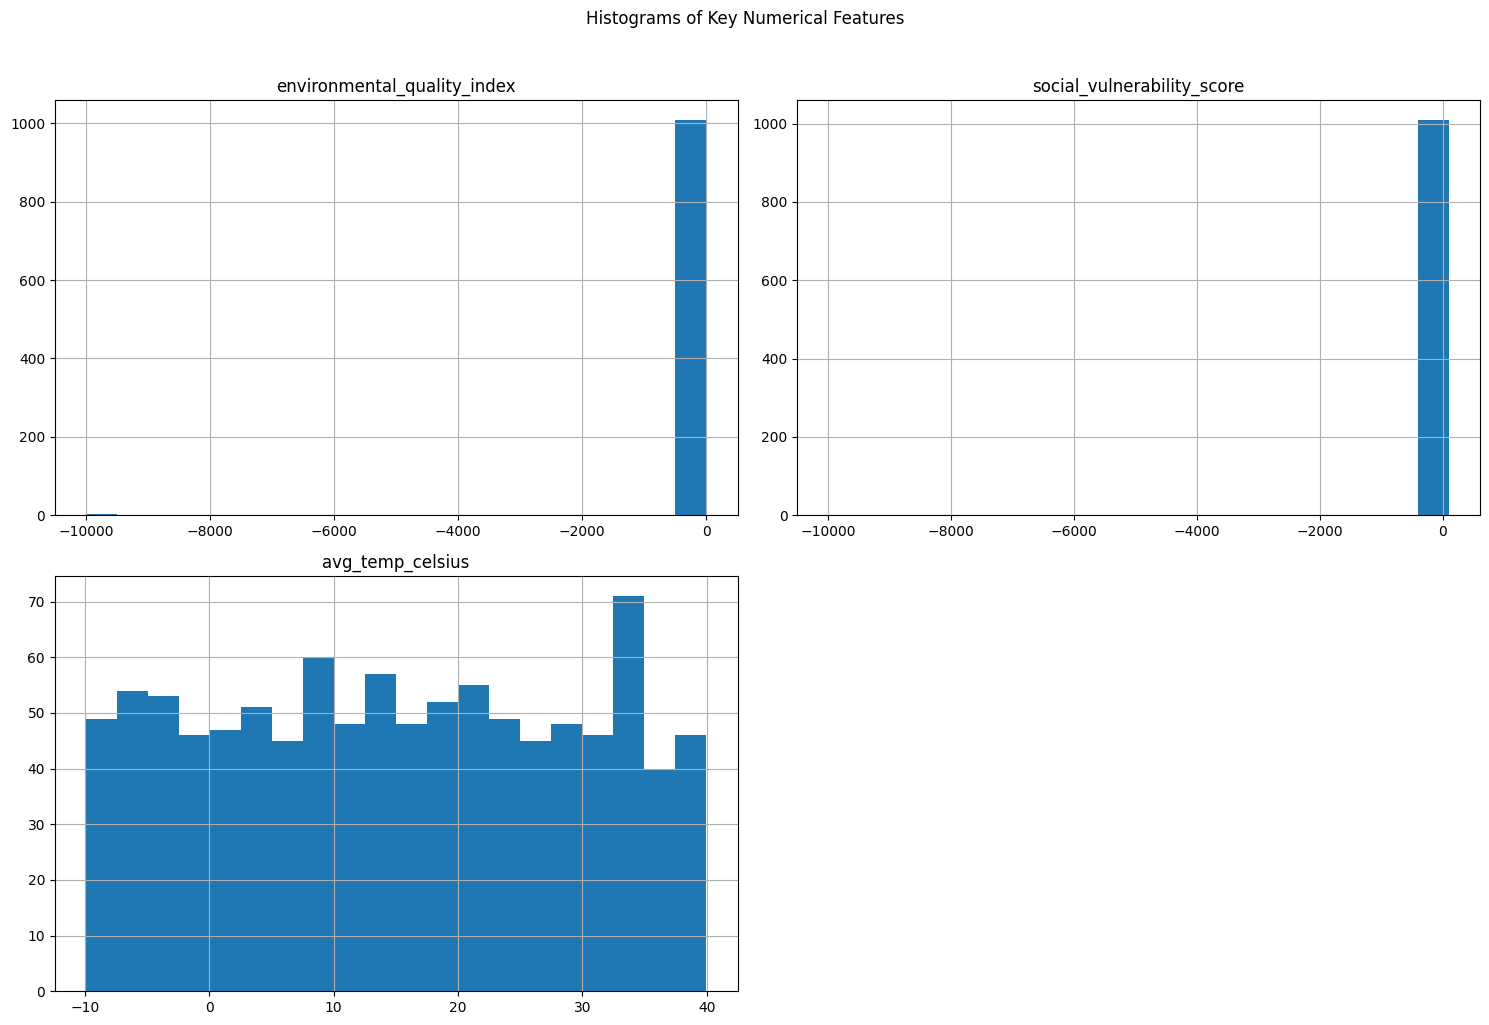

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable 'vulnerability_level'
plt.figure(figsize=(8, 6))
sns.countplot(x='vulnerability_level', data=df)
plt.title('Distribution of Vulnerability Level')
plt.xlabel('Vulnerability Level')
plt.ylabel('Count')
plt.show()

# Create histograms for a few key numerical features
numerical_features = ['environmental_quality_index', 'social_vulnerability_score', 'avg_temp_celsius']
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Key Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

**Reasoning**:
Generate box plots to explore the relationship between numerical features and the target variable, and visualize the correlation matrix to understand the relationships between numerical variables.



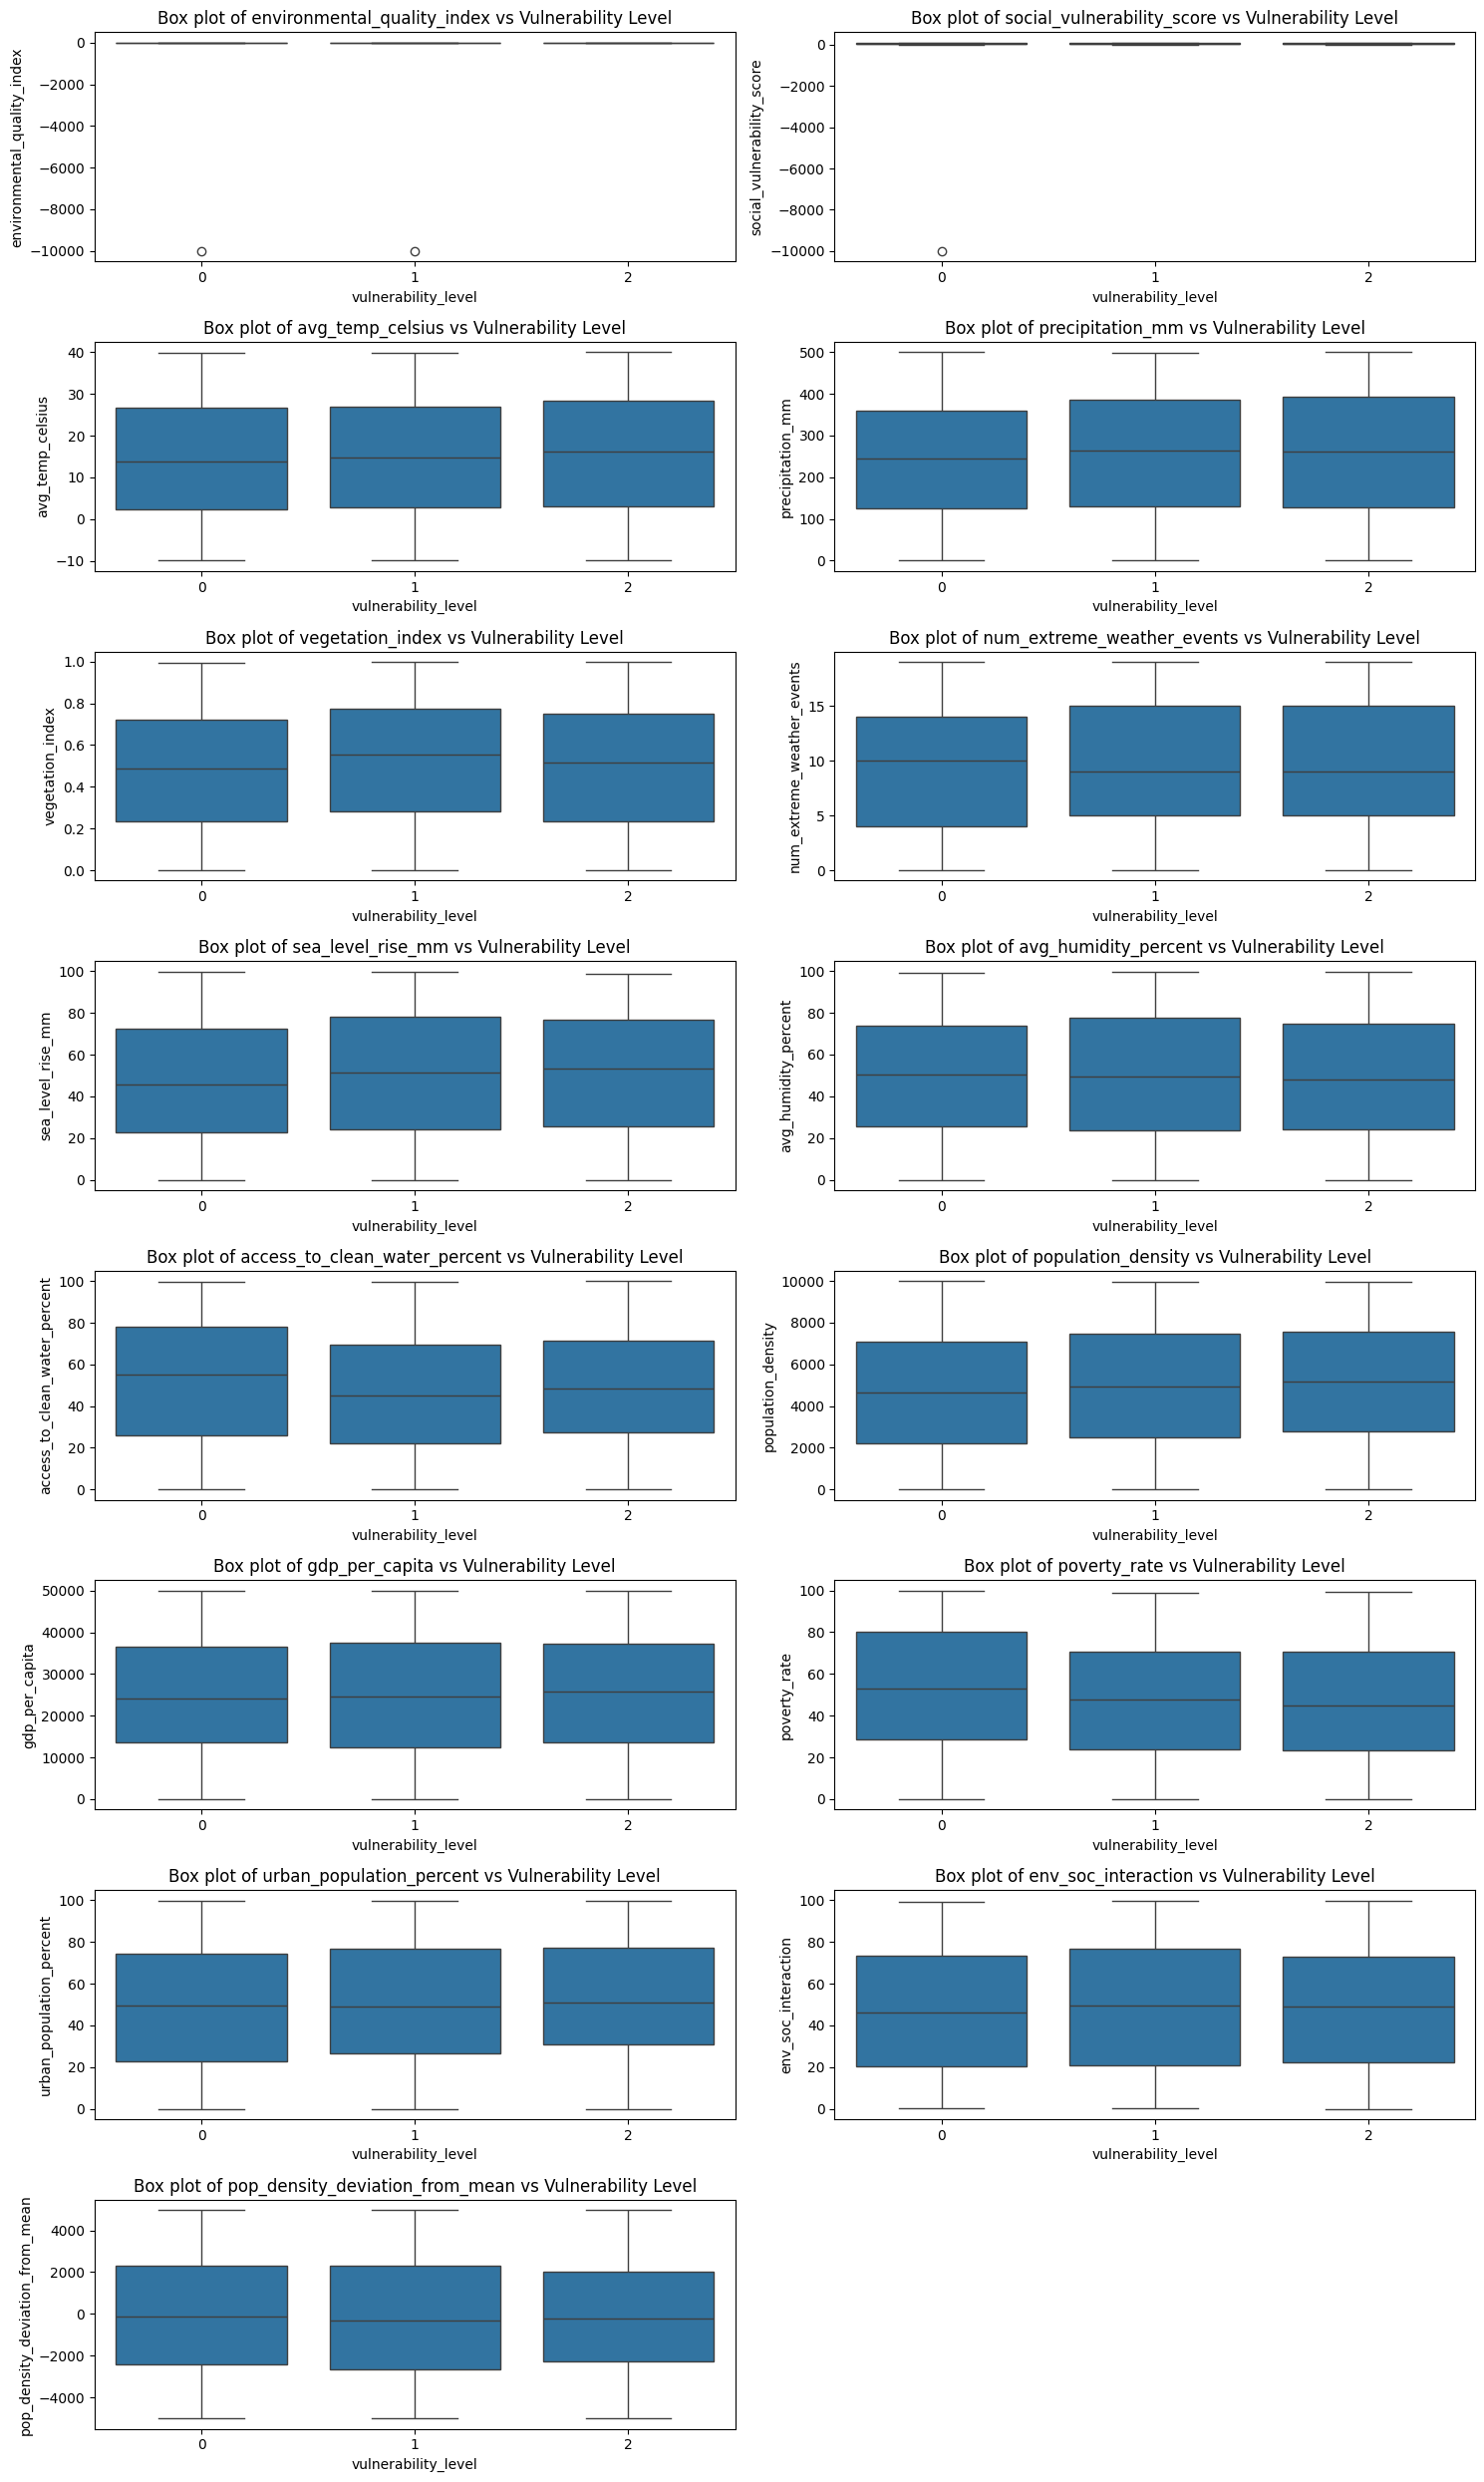

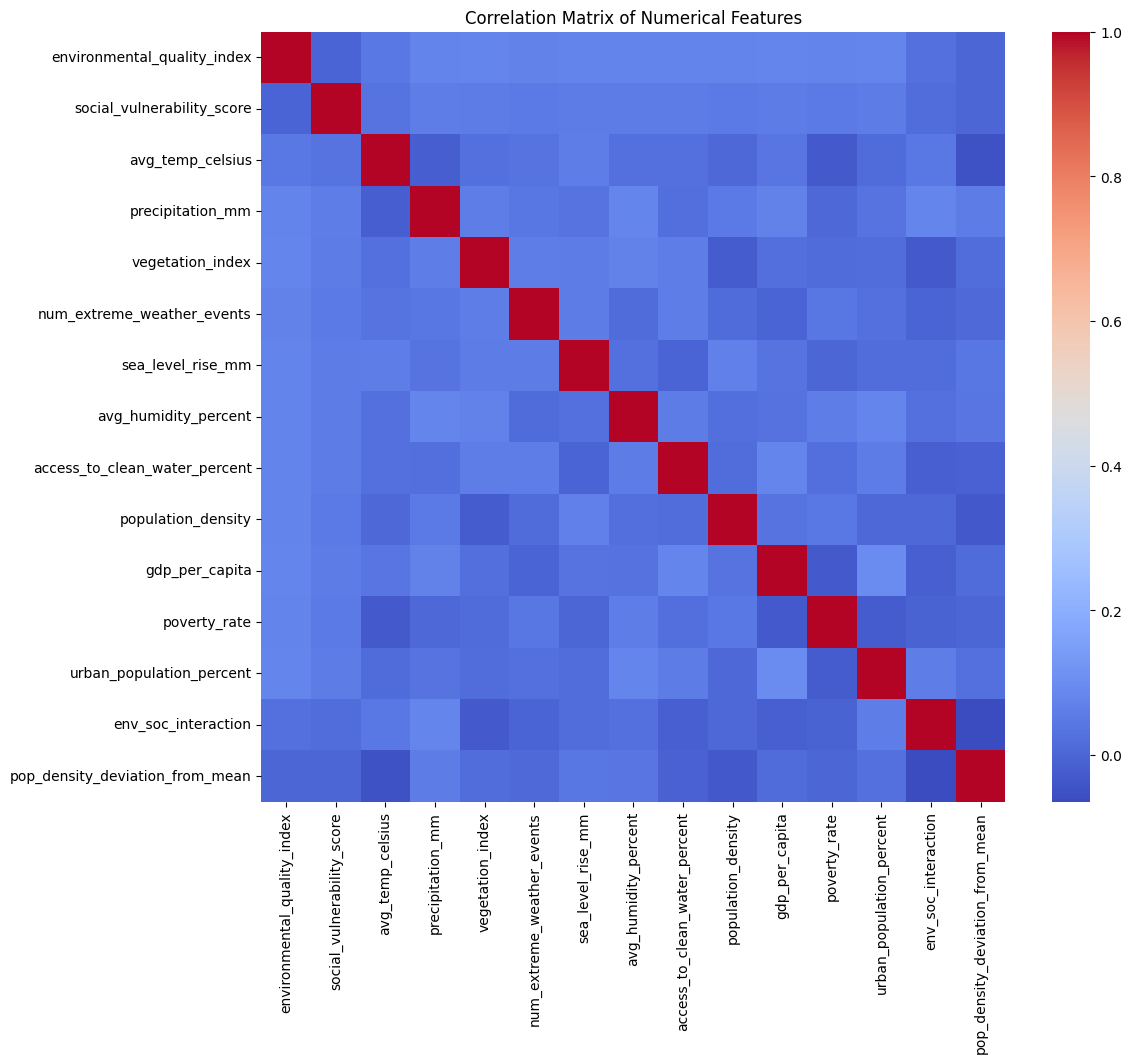

In [ ]:
# Generate box plots for numerical features against the target variable
numerical_features = ['environmental_quality_index', 'social_vulnerability_score', 'avg_temp_celsius',
                      'precipitation_mm', 'vegetation_index', 'num_extreme_weather_events',
                      'sea_level_rise_mm', 'avg_humidity_percent', 'access_to_clean_water_percent',
                      'population_density', 'gdp_per_capita', 'poverty_rate', 'urban_population_percent',
                      'env_soc_interaction', 'pop_density_deviation_from_mean']

plt.figure(figsize=(15, 25))
for i, col in enumerate(numerical_features):
    plt.subplot(8, 2, i + 1)
    sns.boxplot(x='vulnerability_level', y=col, data=df)
    plt.title(f'Box plot of {col} vs Vulnerability Level')
plt.tight_layout()
plt.show()

# Calculate and visualize the correlation matrix of the numerical features
# Exclude columns with too many missing values or constant values based on previous steps
numerical_df = df[numerical_features]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Preprocess the data

### Subtask:
Prepare the data for the multi-class classification model. This may involve handling missing values, encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets.


**Reasoning**:
Handle missing values, replace sentinel values, separate features and target, encode categorical features, scale numerical features, and split the data into training and testing sets as per the instructions.



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Identify and handle missing values and sentinel values
# Drop columns with a large number of missing values
df = df.drop(['literacy_rate', 'gender_equality_index'], axis=1)

# Replace sentinel values (-9999) with NaN in specified columns
df['environmental_quality_index'] = df['environmental_quality_index'].replace(-9999, np.nan)
df['social_vulnerability_score'] = df['social_vulnerability_score'].replace(-9999, np.nan)
df['population_affected_by_hazards'] = df['population_affected_by_hazards'].replace(-9999, np.nan)


# Impute remaining missing values with the median
for col in df.columns:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# 2. Separate features (X) and target variable (y)
X = df.drop('vulnerability_level', axis=1)
y = df['vulnerability_level']

# 3. Identify categorical features (excluding dummy variables)
# The dummy variables 'geographic_zone_Coastal', 'geographic_zone_Inland', 'geographic_zone_Mountain' are already created
# Assuming other non-numerical columns are categorical and not dummy variables.
# Let's inspect the data types to confirm.
categorical_features = X.select_dtypes(include='bool').columns.tolist()


# 4. Identify numerical features
numerical_features = X.select_dtypes(include=np.number).columns.tolist()


# Create a column transformer for preprocessing
# Apply one-hot encoding to categorical features and standard scaling to numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns (already dummified geographic_zone)
)

# 5. Split the preprocessed and scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply the preprocessing to the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Apply the preprocessing to the testing data
X_test_processed = preprocessor.transform(X_test)

print("Shape of original features:", X.shape)
print("Shape of preprocessed training features:", X_train_processed.shape)
print("Shape of preprocessed testing features:", X_test_processed.shape)
print("Shape of training target:", y_train.shape)
print("Shape of testing target:", y_test.shape)

Shape of original features: (1010, 19)
Shape of preprocessed training features: (808, 22)
Shape of preprocessed testing features: (202, 22)
Shape of training target: (808,)
Shape of testing target: (202,)


## Build the model

### Subtask:
Choose a suitable multi-class classification algorithm and build the model using the training data.


**Reasoning**:
Import the necessary multi-class classification algorithm and train the model using the preprocessed training data.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model using the preprocessed training data
model.fit(X_train_processed, y_train)

print("Model training complete.")

Model training complete.


## Evaluate the model

### Subtask:
Evaluate the performance of the trained model using appropriate metrics on the testing data.


**Reasoning**:
Evaluate the performance of the trained model using appropriate metrics on the testing data as per the instructions.



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use the trained model to make predictions on the preprocessed testing data
y_pred = model.predict(X_test_processed)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.3069

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.26      0.28        61
           1       0.28      0.24      0.26        67
           2       0.33      0.41      0.36        74

    accuracy                           0.31       202
   macro avg       0.30      0.30      0.30       202
weighted avg       0.30      0.31      0.30       202


Confusion Matrix:
[[16 17 28]
 [18 16 33]
 [20 24 30]]


## Predict vulnerability

### Subtask:
Use the trained model to predict the vulnerability based on the input features.


**Reasoning**:
Use the trained model to make predictions on the preprocessed test data and display the first few predictions.



In [ ]:
# Use the trained model to make predictions on the preprocessed test data
y_pred = model.predict(X_test_processed)

# Display the first few predictions to inspect the output
print("First 10 predictions:")
print(y_pred[:10])

First 10 predictions:
[1 1 0 2 2 2 0 2 0 2]


## Summary:

### Data Analysis Key Findings

*   The dataset contains 1010 rows and 22 columns.
*   Columns 'literacy\_rate' and 'gender\_equality\_index' were dropped due to having 1000 out of 1010 missing values.
*   Sentinel values (-9999) in 'environmental\_quality\_index', 'social\_vulnerability\_score', and 'population\_affected\_by\_hazards' were replaced with NaN and then imputed with the median.
*   The target variable 'vulnerability\_level' has a relatively balanced distribution across its classes.
*   The preprocessed data resulted in 22 features after handling missing values, scaling numerical features, and one-hot encoding boolean categorical features.
*   A RandomForestClassifier model was trained for multi-class classification.
*   The trained model achieved an accuracy of approximately 30.69% on the test set.
*   The classification report and confusion matrix indicate low precision, recall, and F1-scores for all classes, confirming the poor predictive performance of the model.

### Insights or Next Steps

*   The current model performance is poor, indicating that the features or the chosen model might not be sufficient to accurately predict vulnerability levels.
*   Further investigation into feature engineering, exploring different machine learning algorithms (e.g., Gradient Boosting, Support Vector Machines), or hyperparameter tuning is necessary to improve model performance.
